In [ ]:
# Malignant Project

In [39]:
# importing all necessery libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score, classification_report, f1_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
# getting the dataframe
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [17]:
# checking null values
train_df.isnull().any()  

id                  False
comment_text        False
malignant           False
highly_malignant    False
rude                False
threat              False
abuse               False
loathe              False
dtype: bool

In [18]:
len(train_df)

159571

Collecting all the different types of Output into Lists

In [7]:
malignant = list(train_df.malignant)
highly_malignant = list(train_df.highly_malignant)
rude = list(train_df.rude)
threat= list(train_df.threat)
abuse = list(train_df.abuse)
loathe = list(train_df.loathe)

In [28]:
# Adding all the outputs. If the sum is 0 indicating non-offensive comments and sum > 0 indicating malignant comments
Target = []
for i,j,k,l,m,n in zip(malignant,highly_malignant,rude,threat,abuse,loathe):
    Target.append(i+j+k+l+m+n)    

In [29]:
len(Target)

159571

In [30]:
from collections import Counter
print(dict(Counter(Target)))

{0: 143346, 4: 1760, 1: 6360, 3: 4209, 2: 3480, 5: 385, 6: 31}


Here we can see that the dataset contains mostly outputs with 0 i.e. non-malignant comments and if Target > 1 indicating that the comment falls in more than one category such as rude, malignant, loathe, abuse etc.

In [31]:
#Changing Target with value more than 1 into 1 so that we have a binary classification problem:- malignant or non-malignant
Target2= []
for i in Target:
    if i == 0:
        Target2.append(0)
    else:
        Target2.append(1)

In [32]:
print(dict(Counter(Target2)))

{0: 143346, 1: 16225}


Here Label "1" are offensive comments and "0" are non-offensive

In [57]:
# Defining Function for Word Clouds
def Word_Cloud(str_List):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in str_List:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [34]:
train_df["Target"] = Target2

In [80]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Target'],
      dtype='object')

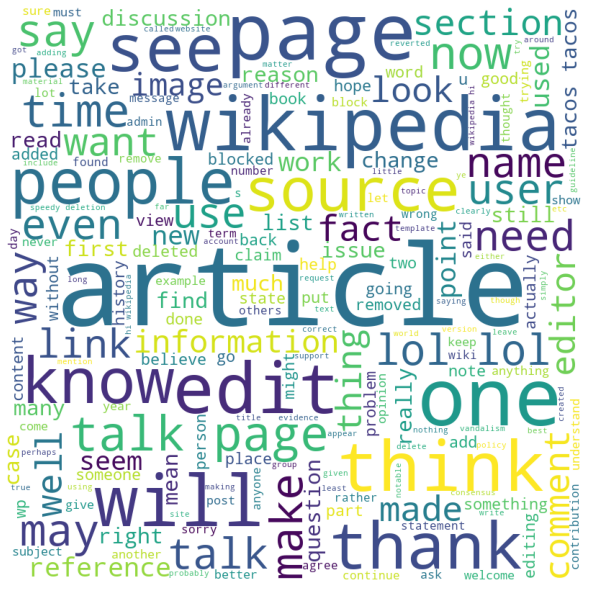

In [107]:
#Plotting Word Cloud using the function defined for a sample of non-malignant comments with Target = 0
Word_Cloud(list(train_df[train_df.Target == 0].sample(n=15000).comment_text))
#Taking only 15000 samples for the plot since Target=0 has 143346 records which will take huge processing time for the plot

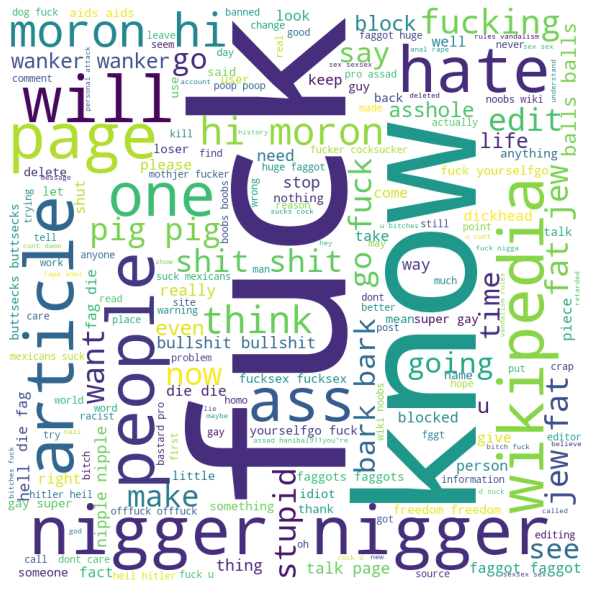

In [62]:
# Plotting the Word-Cloud for all the malignant comments
Word_Cloud(list(train_df[train_df.Target != 0].comment_text))

In [73]:
Malignant_Columns = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

In [77]:
# Printing Count for all types of Offensive comments in the Dataset
for cols in Malignant_Columns:
    print("Comment_Type :",str(cols).upper())
    print("Count of such comments in the Dataset :", len(train_df[train_df[cols] != 0]))
    print()

Comment_Type : MALIGNANT
Count of such comments in the Dataset : 15294

Comment_Type : HIGHLY_MALIGNANT
Count of such comments in the Dataset : 1595

Comment_Type : RUDE
Count of such comments in the Dataset : 8449

Comment_Type : THREAT
Count of such comments in the Dataset : 478

Comment_Type : ABUSE
Count of such comments in the Dataset : 7877

Comment_Type : LOATHE
Count of such comments in the Dataset : 1405



Comment_Type : MALIGNANT     Count : 15294


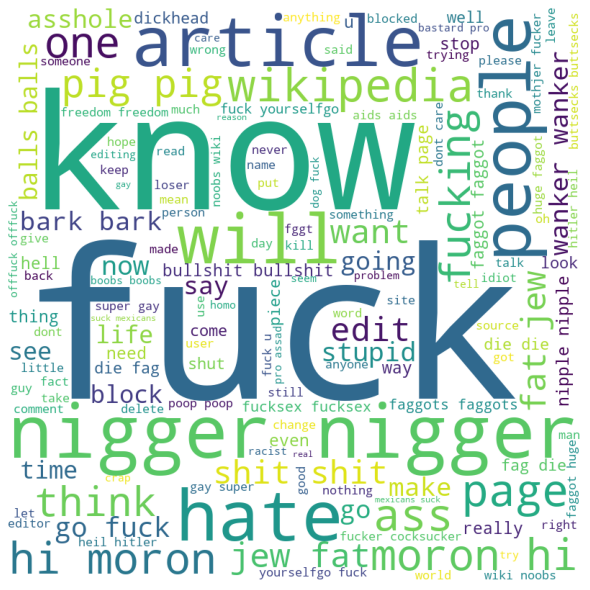

###################################################

Comment_Type : HIGHLY_MALIGNANT     Count : 1595


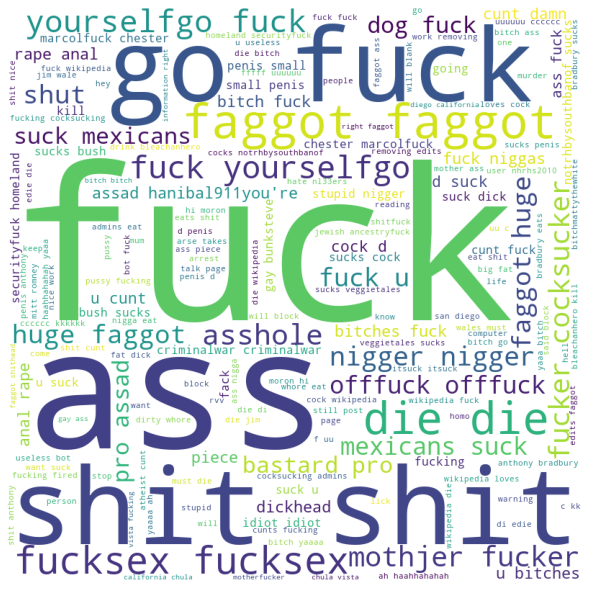

###################################################

Comment_Type : RUDE     Count : 8449


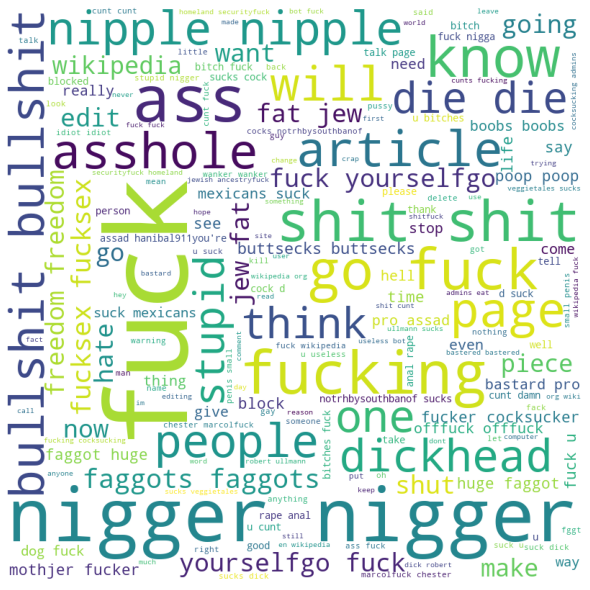

###################################################

Comment_Type : THREAT     Count : 478


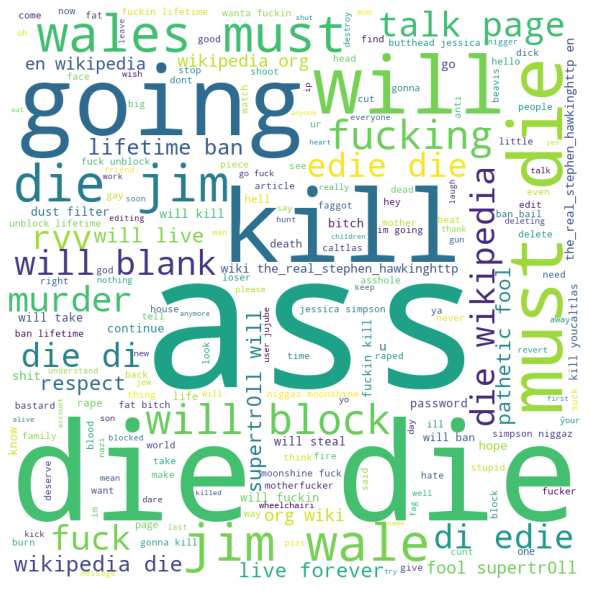

###################################################

Comment_Type : ABUSE     Count : 7877


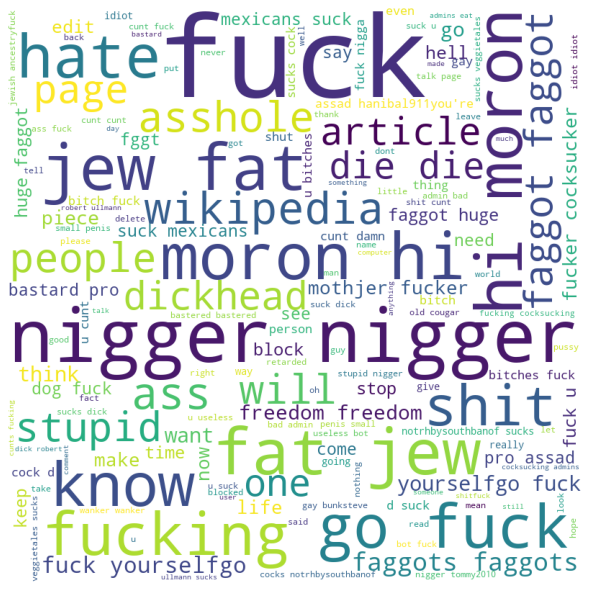

###################################################

Comment_Type : LOATHE     Count : 1405


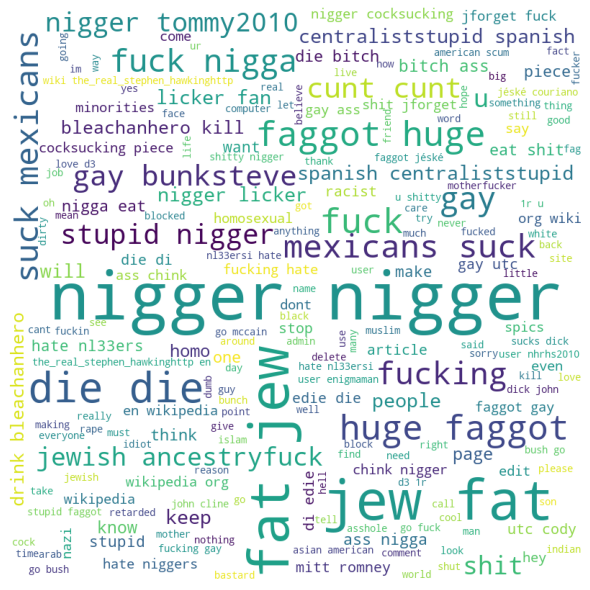

###################################################



In [79]:
# Plotting Word Cloud for all types of Offensive comments
for cols in Malignant_Columns:
    print("Comment_Type :",str(cols).upper(),"    Count :",len(train_df[train_df[cols] != 0]))
    Word_Cloud(list(train_df[train_df[cols] != 0].comment_text))
    print("###################################################")
    print()

### Testing Models for Malignant Comments Prediction 

In [40]:
# Defining Input data and Output to be predicted
X = train_df.comment_text
y = train_df.Target

In [41]:
# Splitting the train_df into training and validation dataset
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=88)

Using TF-IDF to convert text data into numerical format for Machine Learning Models 

In [42]:
vectorizer = TfidfVectorizer(min_df =1,stop_words='english',use_idf=True,analyzer='word',
                             ngram_range=(1,1),max_features=15000)
x_train = vectorizer.fit_transform(X_train)
x_val  = vectorizer.transform(X_val)

#### Logistic Regression Model 

In [43]:
logisticRegr = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=5,tol=0.001,max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=5,
                   solver='liblinear', tol=0.001)

In [44]:
prediction = logisticRegr.predict(x_val)

In [45]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, prediction))
print('\n','ACCURACY','\n',accuracy_score(y_val, prediction))
print('\n','REPORT','\n',classification_report(y_val,prediction))


 CONFUSION MATRIX 
 [[27295  1436]
 [  425  2759]]

 ACCURACY 
 0.9416888610371299

 REPORT 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     28731
           1       0.66      0.87      0.75      3184

    accuracy                           0.94     31915
   macro avg       0.82      0.91      0.86     31915
weighted avg       0.95      0.94      0.95     31915



#### Ada Boost Classifier 

In [46]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.01)
ada.fit(x_train,y_train)  

AdaBoostClassifier(learning_rate=0.01)

In [48]:
predictions2 = ada.predict(x_val)

In [50]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, predictions2))
print('\n','ACCURACY','\n',accuracy_score(y_val, predictions2))
print('\n','REPORT','\n',classification_report(y_val,predictions2))


 CONFUSION MATRIX 
 [[28717    14]
 [ 2667   517]]

 ACCURACY 
 0.9159956133479555

 REPORT 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28731
           1       0.97      0.16      0.28      3184

    accuracy                           0.92     31915
   macro avg       0.94      0.58      0.62     31915
weighted avg       0.92      0.92      0.89     31915



#### Random Forest Classifier 

In [51]:
rand = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=None,class_weight='balanced')
rand.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None)

In [54]:
prediction3 = rand.predict(x_val)

In [55]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, prediction3))
print('\n','ACCURACY','\n',accuracy_score(y_val, prediction3))
print('\n','REPORT','\n',classification_report(y_val,prediction3))


 CONFUSION MATRIX 
 [[27881   850]
 [  859  2325]]

 ACCURACY 
 0.9464515118282939

 REPORT 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     28731
           1       0.73      0.73      0.73      3184

    accuracy                           0.95     31915
   macro avg       0.85      0.85      0.85     31915
weighted avg       0.95      0.95      0.95     31915



 Random Forest Model has showed highest Accuracy the Logistic Regression Model is better with a higher F1 score. So we can take this model as the Final Model

In [35]:
test_df = pd.read_csv("test.csv")   # Loading the Test Dataset

In [36]:
test_df.isnull().any()   # No Null values

id              False
comment_text    False
dtype: bool

In [37]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [81]:
X_test = test_df.comment_text    # Taking the input data from the Dataset

In [82]:
x_test  = vectorizer.transform(X_test)   # Using the same vectoriser modelled on the train Dataset to convert into TF-IDF 

In [101]:
# Using the Best Model Logistic Regression
predictions_final = logisticRegr.predict(x_test)

In [102]:
# Labelling the prediction outputs '0' and '1' into non-malignant and malignant
Label = []
for i in predictions_final:
    if i == 0:
        Label.append("Not malignant")
    else:
        Label.append("Malignant")       

In [103]:
test_df["Label"] = Label

### Checking the perfomance of the Model 

Count of Malignant Comments in the Test Dataset : 43305


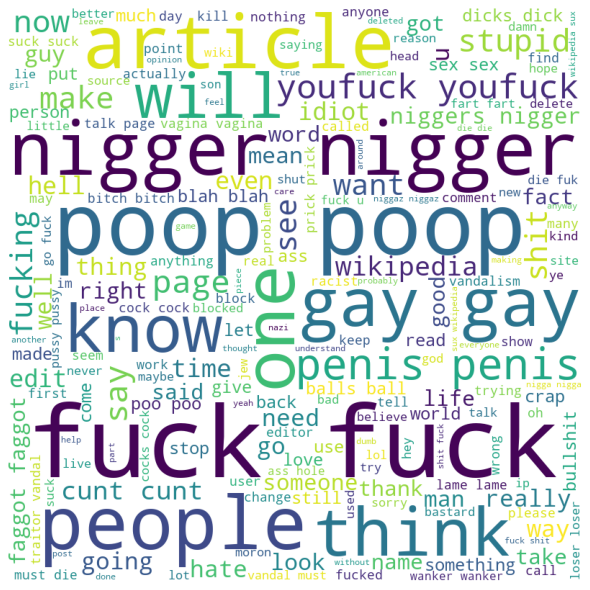

In [104]:
# Plotting Word Cloud for all the comments predicted as Malignant
print("Count of Malignant Comments in the Test Dataset :",len(test_df[test_df["Label"] == "Malignant"]))
Word_Cloud(list(test_df[test_df["Label"] == "Malignant"].comment_text))

In [105]:
# Huge number of non-malignant comments
test_df[test_df["Label"] == "Not malignant"]

,id,comment_text,Label
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,Not malignant
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",Not malignant
3,00017563c3f7919a,":If you have a look back at the source, the in...",Not malignant
4,00017695ad8997eb,I don't anonymously edit articles at all.,Not malignant
5,0001ea8717f6de06,Thank you for understanding. I think very high...,Not malignant
...,...,...,...
153156,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",Not malignant
153157,fffc2b34bbe61c8d,:Disagree. Soviet railways need their own arti...,Not malignant
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,Not malignant
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",Not malignant


Count of Non - Malignant Comments in the Test Dataset : 109859


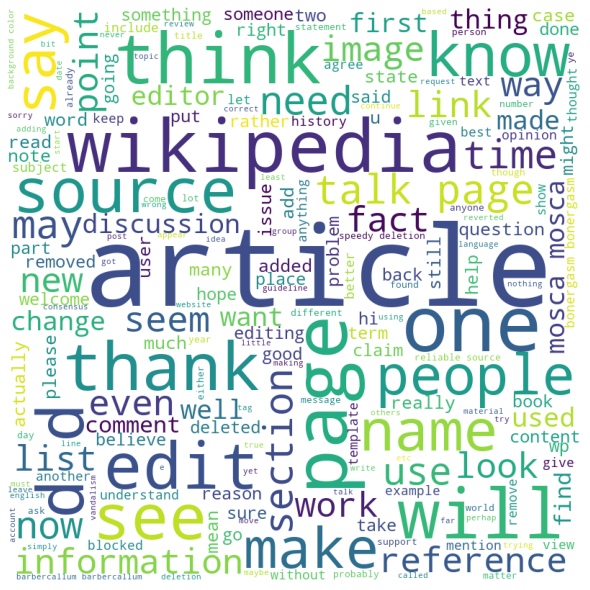

In [108]:
# Plotting a sample = 15000 records from the comments predicted as non-malignant
print("Count of Non - Malignant Comments in the Test Dataset :",len(test_df[test_df["Label"] == "Not malignant"]))
Word_Cloud(list(test_df[test_df["Label"] == "Not malignant"].sample(n = 15000).comment_text))

#### From the Word Clouds plotted it is clear that the ML Model is able to classify the comments into Malignant and Non-malignant ones even in the Unseen Test Dataset 